In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# titanic.csv 를 데이터프레임으로 read  , encoding = "euc-kr" 
titanic = pd.read_csv("titanic.csv", encoding = "euc-kr") 

In [56]:
titanic.head()

,PassengerId,생존여부,객실등급,이름,성별,나이,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
print(titanic.isna().sum())
titanic.dropna(
    axis = 0,
    how= 'any',
    inplace = True,
    subset=['나이','Embarked']
)

PassengerId      0
생존여부             0
객실등급             0
이름               0
성별               0
나이             177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 비교 시각화 

#### 1 여성 생존비율, 남성 생존 비율 비교 시각화 

Text(0.5, 1.0, 'alive')

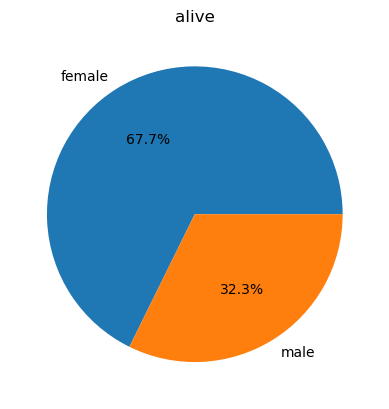

In [62]:
alive = titanic.loc[titanic['생존여부'] == 1, ('PassengerId')].groupby(titanic['성별'])
plt.pie(alive.size(), labels = alive.indices.keys(), autopct='%.1f%%')
plt.title('alive')

#### 2 객실 등급별  생존비율 비교 시각화 

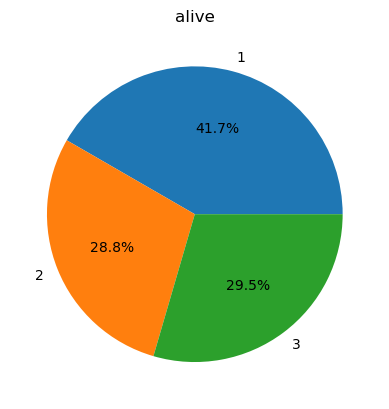

In [51]:
alive = titanic.loc[titanic['생존여부'] == 1, ('PassengerId')].groupby(titanic['객실등급'])
plt.pie(alive.size(), labels = alive.indices.keys(), autopct='%.1f%%')
plt.title('alive')
plt.show()

#### 3 승선항구(Embarked ) 별 생존비율 비교 시각화 

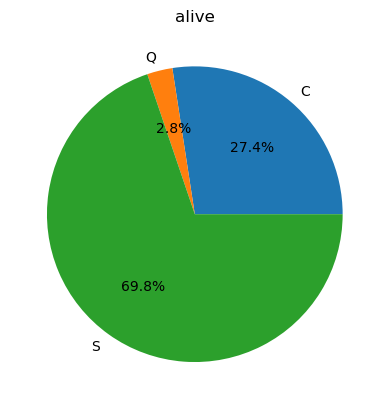

In [52]:
alive = titanic.loc[titanic['생존여부'] == 1, ('PassengerId')].groupby(titanic['Embarked'])
plt.pie(alive.size(), labels = alive.indices.keys(), autopct='%.1f%%')
plt.title('alive')
plt.show()

#### 4.  생존한 승객과 그렇지 않은 승객의 연령이 통계학적으로 차이가 난다고 할 수 있는지 95%  신뢰수준으로t 검정하세요. 

#### 대립가설은 무엇이고, 채택인가 기각인가? 
#### 귀무가설은 무엇이고, 채택인가 기각인가? 

In [53]:
'''
귀무가설: 생존한 승객과 사망한 승객의 연령이 통계학적으로 차이가 난다고 볼 수 없다.
대립가설: 생존한 승객과 사망한 승객의 연령이 통계학적으로 차이가 난다고 볼 수 있다.
'''
from scipy import stats
alive = titanic.loc[titanic['생존여부'] == 1, ('나이')]
dead = titanic.loc[titanic['생존여부'] == 0, ('나이')]

tTestResult = stats.ttest_ind(alive, dead)
tTestResult

TtestResult(statistic=-2.2043427748445956, pvalue=0.027820316250851285, df=710.0)

In [54]:
'''따라서 귀무가설은 채택, 대립 가설은 기각. 생존 여부와 나이는 통계학적으로 유의미하다고 볼 수 있다.'''

'따라서 귀무가설은 채택, 대립 가설은 기각. 생존 여부와 나이는 통계학적으로 유의미하다고 볼 수 있다.'